<h2>About this Project</h2>
<p>In this project, you will implement your own perceptron. You'll implement a linear classifier and the perceptron update functions. You'll also have a chance to visualize your perceptron.</p>

<h3>Evaluation</h3>

<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run a series of tests on your code. You will receive instant feedback from the autograder that will identify issues with and errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells, not just those you’ve edited, to ensure the code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p><strong>This exercise must be successfully completed in order to receive credit for this course.</strong><p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder/Instructor Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder/instructor review. Follow these steps:</p>

<ol>
<li>Save your notebook. Though the system should automatically save your progress, you should ensure the latest version of your work is saved before submitting. </li>
  <li>In the blue menu bar along the top of the code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li>Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li>The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [9]:
import numpy as np
import matplotlib 
import sys
import matplotlib.pyplot as plt
import time
from helper import runtest


%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.0


<h2>The Perceptron</h2>

<p>The perceptron is a basic linear classifier. The following cells will walk you through steps and ask you to finish the necessary functions in a pre-defined order. Code cells requiring your input will display # YOUR CODE HERE and graded portions will be adequately labeled. Unless specified otherwise, do not use loops.<br></p>

<h3>Part One [Graded]</h3>
<p>Implement the function below to update the perceptron given an input vector, label, and weight vector.</p>

In [10]:
def perceptron_update(x,y,w):
    """
    function w=perceptron_update(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
    x : input vector of d dimensions (d)
    y : corresponding label (-1 or +1)
    w : weight vector of d dimensions
    
    Output:
    w : weight vector after updating (d)
    """
    
    ### BEGIN SOLUTION
    w += y*x.flatten()
    return w.flatten()
    ### END SOLUTION

<h3>Test Your Code</h3>
<p>The following cell will test your code to ensure the update is working.</p>

In [12]:
def test_perceptron_update():
    x = np.array([0,1])
    y = -1
    w = np.array([1,1])
    w1 = perceptron_update(x,y,w)
    return (w1.reshape(-1,) == np.array([1,0])).all()

runtest(test_perceptron_update, 'test_perceptron_update')

Running Test: test_perceptron_update ... ✔ Passed!


<h3>Part Two [Graded]</h3>

<p>Implement function <b><code>perceptron</code></b>. This should contain a loop that calls 
<b><code>perceptron_update</code></b>
 until it converges or the maximum iteration count, 100, has been reached.
 Make sure you randomize the order of the training data on each iteration. </p>

In [4]:
def perceptron(xs,ys):
    """
    function w=perceptron(xs,ys);
    
    Implementation of a Perceptron classifier
    Input:
    xs : n input vectors of d dimensions (nxd)
    ys : n labels (-1 or +1)
    
    Output:
    w : weight vector (1xd)
    b : bias term
    """

    n, d = xs.shape     # so we have n input vectors, of d dimensions each
    w = np.zeros(d)
    b = 0.0
    
    ### BEGIN SOLUTION
    iter_count = 0
    while True:
        m = 0
        # Shuffle the indices of the datapoints
        for i in np.random.permutation(n):
            if ys[i]*(np.dot(w, xs[i]) + b) <= 0:
                perceptron_update(xs[i], ys[i], w)
                b += ys[i]
                m += 1
        
        iter_count += 1
        if m == 0 or iter_count == 100:
            break
    ### END SOLUTION
    return (w,b)

<h3>Test Your Code</h3>

<p> You can use the following script to test your code and visualize your perceptron on linearly separable data in 2 dimensions. Your classifier should find a separating hyperplane on such data.   </p>

Looks like you passed the Perceptron test! :o)


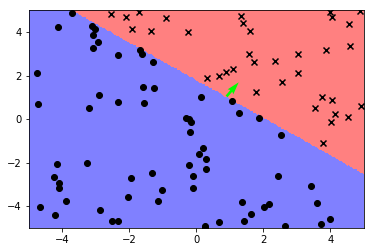

In [5]:
# number of input vectors
N = 100

# generate random (linarly separable) data
xs = np.random.rand(N, 2)*10-5

# defining random hyperplane
w0 = np.random.rand(2)
b0 = np.random.rand()*2-1;

# assigning labels +1, -1 labels depending on what side of the plane they lie on
ys = np.sign(xs.dot(w0)+b0)

# call perceptron to find w from data
w,b = perceptron(xs.copy(),ys.copy())

# test if all points are classified correctly
assert (all(np.sign(ys*(xs.dot(w)+b))==1.0))  # yw'x should be +1.0 for every input
print("Looks like you passed the Perceptron test! :o)")

# we can make a pretty visualization
from helperfunctions import visboundary
visboundary(w,b,xs,ys)

<IPython.core.display.Javascript object>


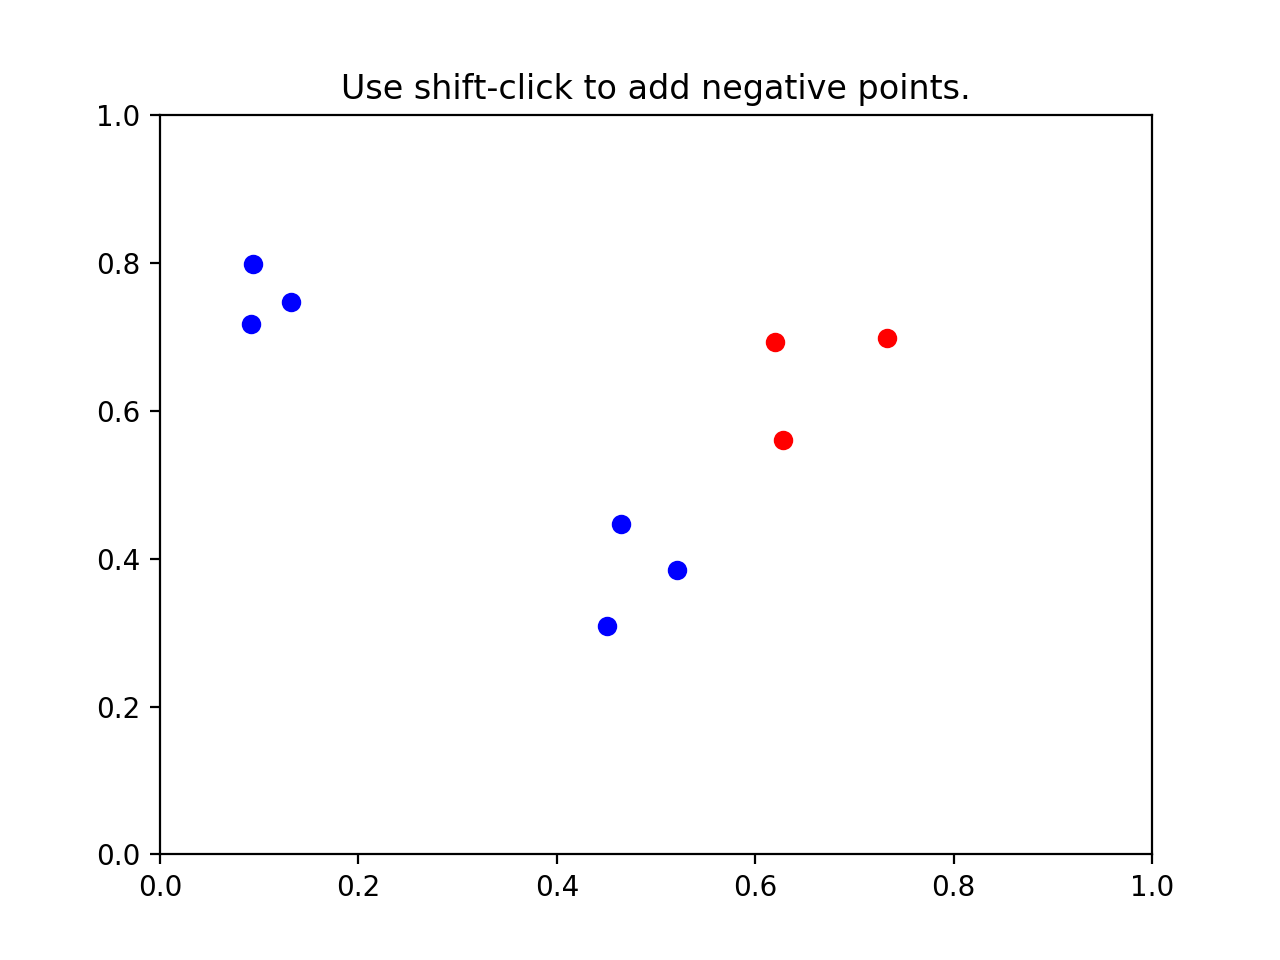

Text(0.5, 1.0, 'Use shift-click to add negative points.')

In [6]:
def onclick(event):
    global w,b,ldata,ax,line,xydata

    pos=np.array([[event.xdata],[event.ydata]])
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    ax.plot(pos[0],pos[1],color)
    ldata.append(label);
    xydata=np.vstack((xydata,pos.T))

    # call Perceptron function
    w,b=perceptron(xydata,np.array(ldata).flatten())

    # draw decision boundary
    q=-b/(w**2).sum() *w;
    if line is None:
        line, = ax.plot([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]],'b--')
    else:
        line.set_data([q[0]-w[1],q[0]+w[1]],[q[1]+w[0],q[1]-w[0]])
    return 
        
xydata=np.random.rand(0,2)
ldata=[]
w=np.zeros(2)
b=np.zeros(1)
line=None

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Use shift-click to add negative points.')

<h3>Part Three [Graded]</h3>

<p>Implement <b><code>classify_linear</code></b> that applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) Make sure that the predictions returned are either 1 or -1.</p> 



In [7]:
def classify_linear(xs,w,b=None):
    """
    function preds=classify_linear(xs,w,b)
    
    Make predictions with a linear classifier
    Input:
    xs : n input vectors of d dimensions (nxd) [could also be a single vector of d dimensions]
    w : weight vector of dimensionality d
    b : bias (scalar)
    
    Output:
    preds: predictions (1xn)
    """    
    w = w.flatten()    
    predictions=np.zeros(xs.shape[0])
    
    ### BEGIN SOLUTION
    if b is None:
        b = 0
    predictions = np.sign(xs.dot(w) + b)
    ### END SOLUTION
    return predictions

<h3>Test Your Code</h3>
<p>The following cell will test your code to ensure your classifier is working.</p>

In [8]:
# test classify_linear code:
xs=np.random.rand(1000,2)-0.5 # draw random data 
w0=np.array([0.5,-0.3]) # define a random hyperplane 
b0=-0.1 # with bias -0.1
ys=np.sign(xs.dot(w0)+b0) # assign labels according to this hyperplane (so you know it is linearly separable)
assert (all(np.sign(ys*classify_linear(xs,w0,b0))==1.0))  # the original hyperplane (w0,b0) should classify all correctly
print("Looks like you passed the classify_linear test! :o)")

Looks like you passed the classify_linear test! :o)


In [9]:
### BEGIN HIDDEN TESTS
# Test the perceptron update function on a simple matrix
def test_perceptron_update():
    x = np.array([0,1])
    y = -1
    w = np.array([1,1])
    w1 = perceptron_update(x,y,w)
    return (w1.reshape(-1,) == np.array([1,0])).all()

assert test_perceptron_update(), "Perceptron Update seems incorrect"
### END HIDDEN TESTS
#Autograder cell- do not edit

In [10]:
### BEGIN HIDDEN TESTS
# Test perceptron on a simple 10 dimensional data set
def test_Perceptron1():
    N=100;
    d=10;
    x=np.random.rand(N,d)
    w=np.random.rand(1,d)
    y=np.sign(w.dot(x.T))[0]
    w,b=perceptron(x,y)
    preds=classify_linear(x,w,b)
    return np.array_equal(preds.reshape(-1,),y.reshape(-1,))

assert test_Perceptron1(), "Perceptron did not converge on linearly separable dataset"
### END HIDDEN TESTS
#Autograder cell- do not edit

In [11]:
### BEGIN HIDDEN TESTS
#Test the Perceptron on a linearly separable data set (this must lead to a solution with 100% accuracy):
def test_Perceptron2():
    x=np.array([ [-0.70072, -1.15826],  [-2.23769, -1.42917],  [-1.28357, -3.52909],  [-3.27927, -1.47949],  [-1.98508, -0.65195],  [-1.40251, -1.27096],  [-3.35145,-0.50274],  [-1.37491,-3.74950],  [-3.44509,-2.82399],  [-0.99489,-1.90591],   [0.63155,1.83584],   [2.41051,1.13768],  [-0.19401,0.62158],   [2.08617,4.41117],   [2.20720,1.24066],   [0.32384,3.39487],   [1.44111,1.48273],   [0.59591,0.87830],   [2.96363,3.00412],   [1.70080,1.80916]])
    y=np.array([1]*10 + [-1]*10)
    w,b=perceptron(x,y)
    preds=classify_linear(x,w,b)
    return np.array_equal(preds.reshape(-1,),y.reshape(-1,))

assert test_Perceptron2(), "Perceptron unable to learn linearly separable dataset!"
### END HIDDEN TESTS
#Autograder cell- do not edit